In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [3]:
os.chdir('../data/amazon_review_polarity_csv')

In [4]:
df = pd.read_csv('train.csv', names=['Sentiment', 'Title', 'Text'])

In [5]:
df = df.replace({1: 0})
df = df.replace({2: 1})

/Users/kyleryan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Sentiment')

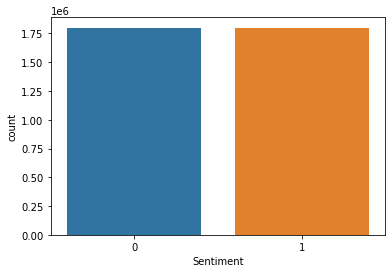

In [7]:
sns.countplot(df.Sentiment)
plt.xlabel('Sentiment')

In [10]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

Downloading: 100%|██████████| 208k/208k [00:00<00:00, 3.56MB/s]
Downloading: 100%|██████████| 29.0/29.0 [00:00<00:00, 19.7kB/s]
Downloading: 100%|██████████| 570/570 [00:00<00:00, 356kB/s]


In [11]:
sample_txt = "I hate when it rains."

In [12]:
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: I hate when it rains.
   Tokens: ['I', 'hate', 'when', 'it', 'rains', '.']
Token IDs: [146, 4819, 1165, 1122, 19267, 119]


In [13]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 102)

In [14]:
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 101)

In [15]:
tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 100)

In [19]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)
encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [20]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

32


tensor([  101,   146,  4819,  1165,  1122, 19267,   119,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0])

In [21]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

32


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

In [22]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

['[CLS]',
 'I',
 'hate',
 'when',
 'it',
 'rains',
 '.',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [30]:
df_neg500 = df[df['Sentiment'] == 0].head(500)
df_pos500 = df[df['Sentiment'] == 1].head(500)

samples = [df_neg500, df_pos500]
df_sentiment1000 = pd.concat(samples)

1000


In [31]:
token_lens = []
for txt in df_sentiment1000.Text:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

In [40]:
#sentences = ['These people are fat.', 'Americans']
sentences = df_sentiment1000.to_numpy()

In [41]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [44]:
nationality_vector = ['American']

In [46]:
sentence_embeddings = model.encode(sentences)
nv_embeddings = model.encode(nationality_vector)

In [48]:
from sklearn.metrics.pairwise import cosine_similarity

cs_arr = cosine_similarity(
    [nv_embeddings[0]],
    sentence_embeddings[1:]
)

In [49]:
print(cs_arr)

[[0.5393361  0.5732125  0.5567306  0.43065703 0.43767458 0.5937036
  0.5293579  0.47712123 0.4883622  0.5614486  0.5815938  0.59450233
  0.5679603  0.50931007 0.4209302  0.4092465  0.5315461  0.48924857
  0.5038209  0.47016686 0.5009714  0.5075798  0.55993295 0.5432826
  0.40968937 0.57018626 0.5032777  0.49119234 0.5084933  0.499627
  0.5341986  0.33872086 0.57308054 0.47525153 0.58315474 0.54760975
  0.488714   0.5098028  0.5623721  0.32612738 0.40714383 0.37379062
  0.493181   0.51283836 0.5641372  0.48222497 0.44155425 0.5448975
  0.5432826  0.5058676  0.35882255 0.529799   0.529799   0.4547105
  0.44624296 0.306507   0.39598554 0.43485963 0.38759625 0.44299483
  0.4353805  0.4218635  0.488446   0.53028667 0.4762826  0.5415168
  0.6151462  0.55596757 0.5790843  0.5659232  0.42090747 0.52565205
  0.46805376 0.51687056 0.48686117 0.43048853 0.5518539  0.51606846
  0.40233177 0.5646131  0.46872938 0.35948774 0.5411997  0.57538056
  0.3923546  0.45093435 0.43156308 0.48649168 0.4080534

In [59]:
df_cs = pd.DataFrame(cs_arr)
df_cs = df_cs.transpose()

In [60]:
df_cs.head(5)

,0
0,0.539336
1,0.573213
2,0.556731
3,0.430657
4,0.437675


In [61]:
df_cs['index_col'] = df_cs.index

In [62]:
print(df_cs)

            0  index_col
0    0.539336          0
1    0.573213          1
2    0.556731          2
3    0.430657          3
4    0.437675          4
..        ...        ...
994  0.574976        994
995  0.536656        995
996  0.415123        996
997  0.565318        997
998  0.316040        998

[999 rows x 2 columns]


<AxesSubplot:xlabel='index_col'>

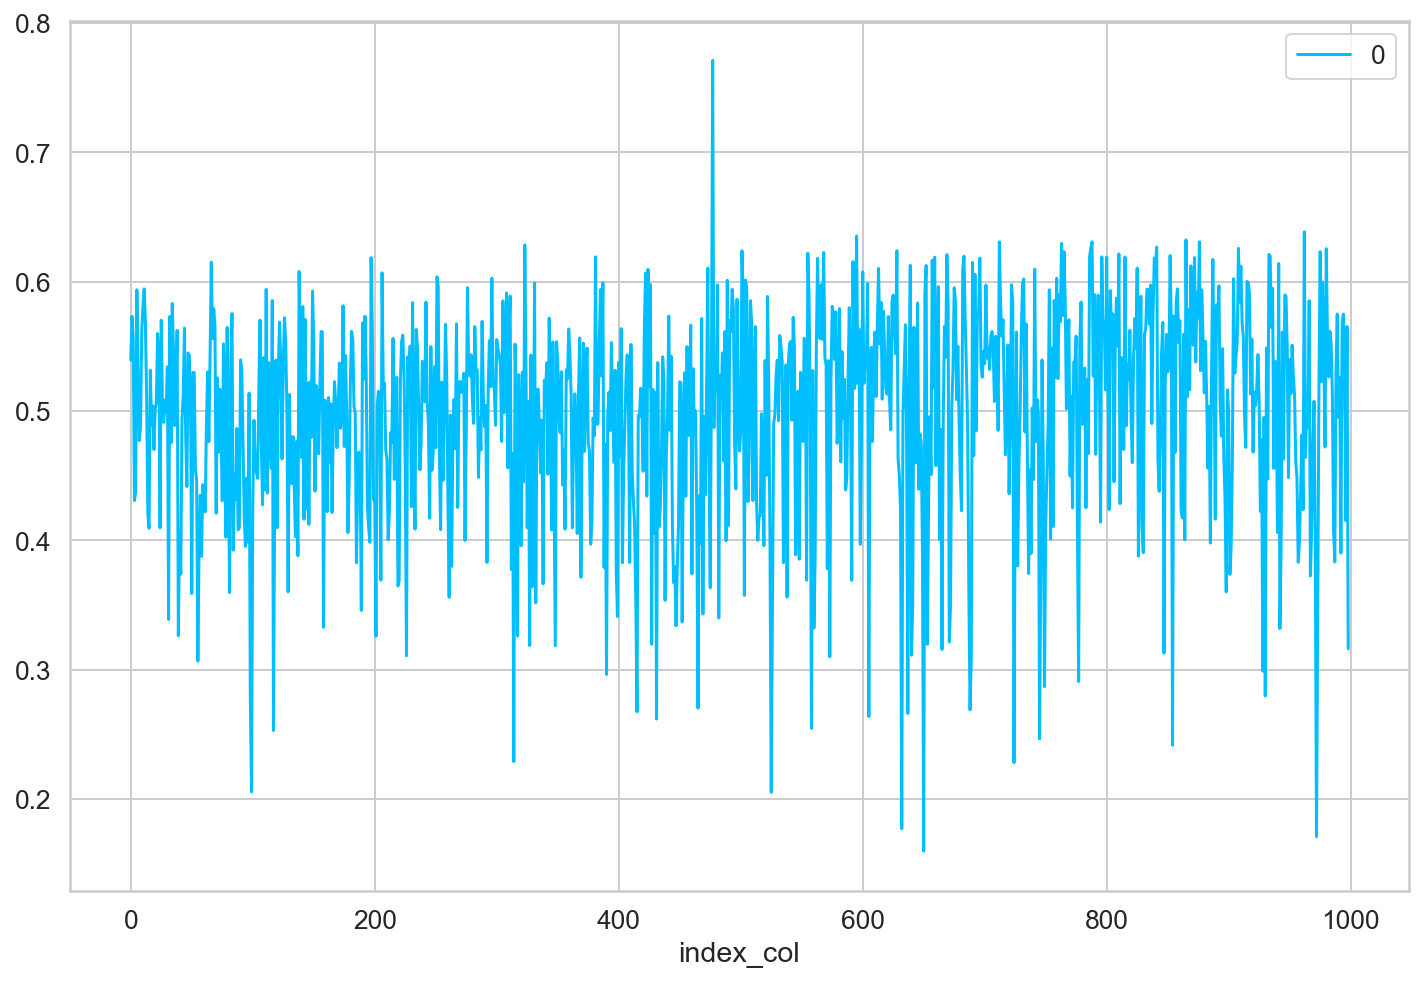

In [63]:
df_cs.plot(x="index_col", y=0)
# Drop Small Dots to Improve Readability
# Intersect with Regression Like Line 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='index_col', ylabel='0'>

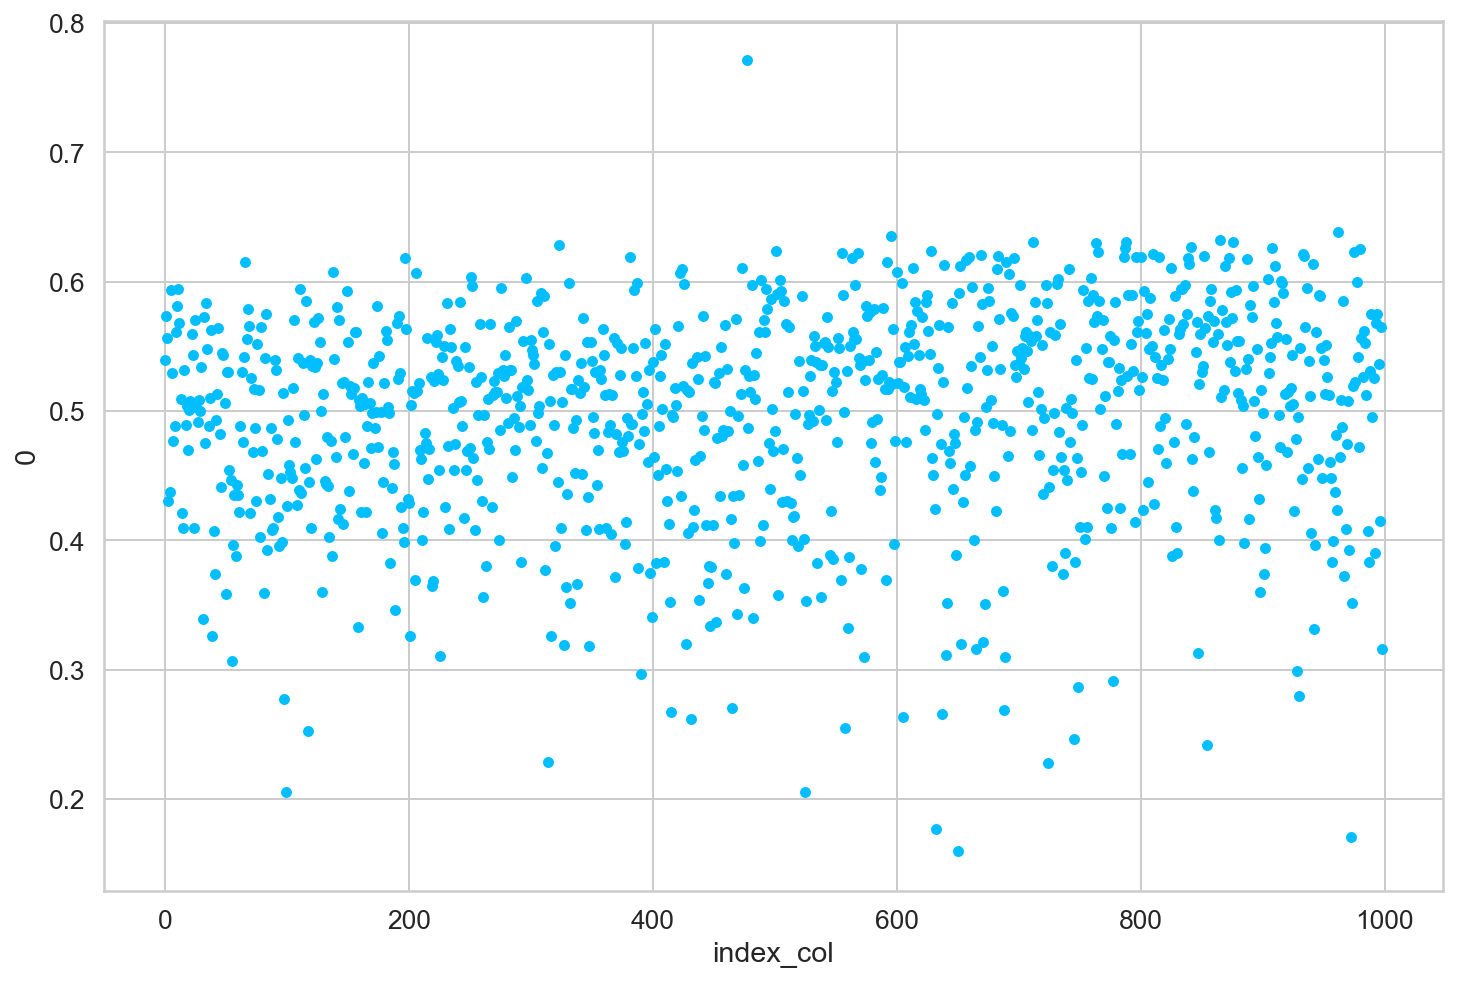

In [64]:
df_cs.plot.scatter(x="index_col", y=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='index_col', ylabel='0'>

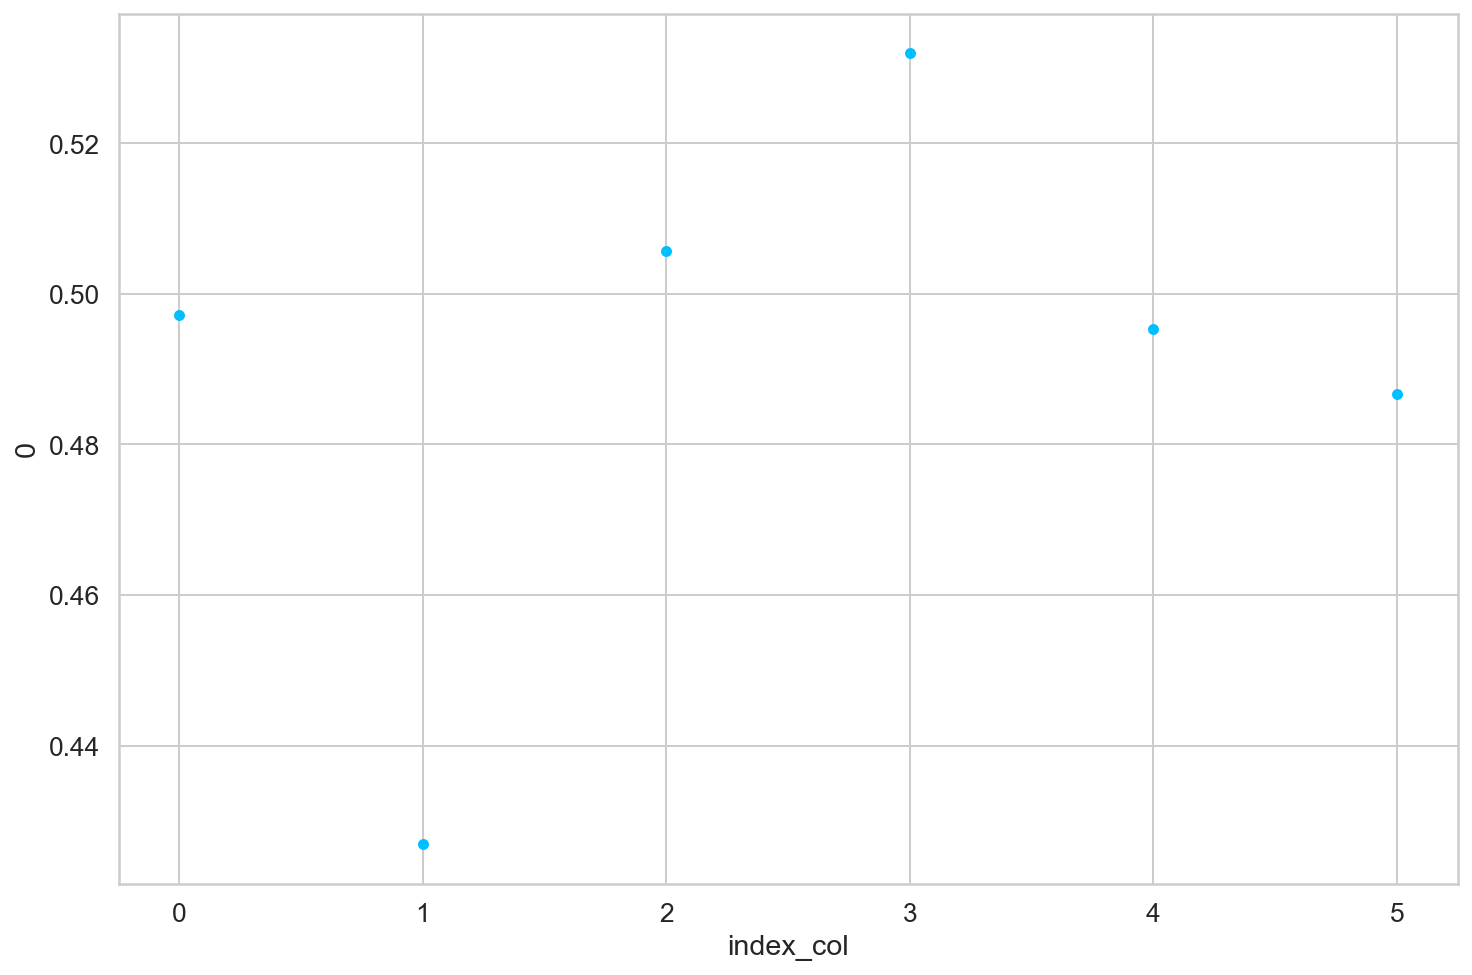

In [272]:
test_adjectives = ['fat', 'lazy', 'stupid', 'fit', 'hardworking', 'smart']
test_nationalities = ['american']

ta_embeddings = model.encode(test_adjectives)
tn_embeddings = model.encode(test_nationalities)

test_cos = cosine_similarity(
    [tn_embeddings[0]],
    ta_embeddings[:]
)


american_cs_df = pd.DataFrame(test_cos)
american_cs_df = american_cs_df.transpose()

american_cs_df['index_col'] = american_cs_df.index

american_cs_df.plot.scatter(x="index_col", y=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Cosine Similarity Between Nationality Noun & Adjectives'}, xlabel='Adjective Index', ylabel='Cosine Similarity'>

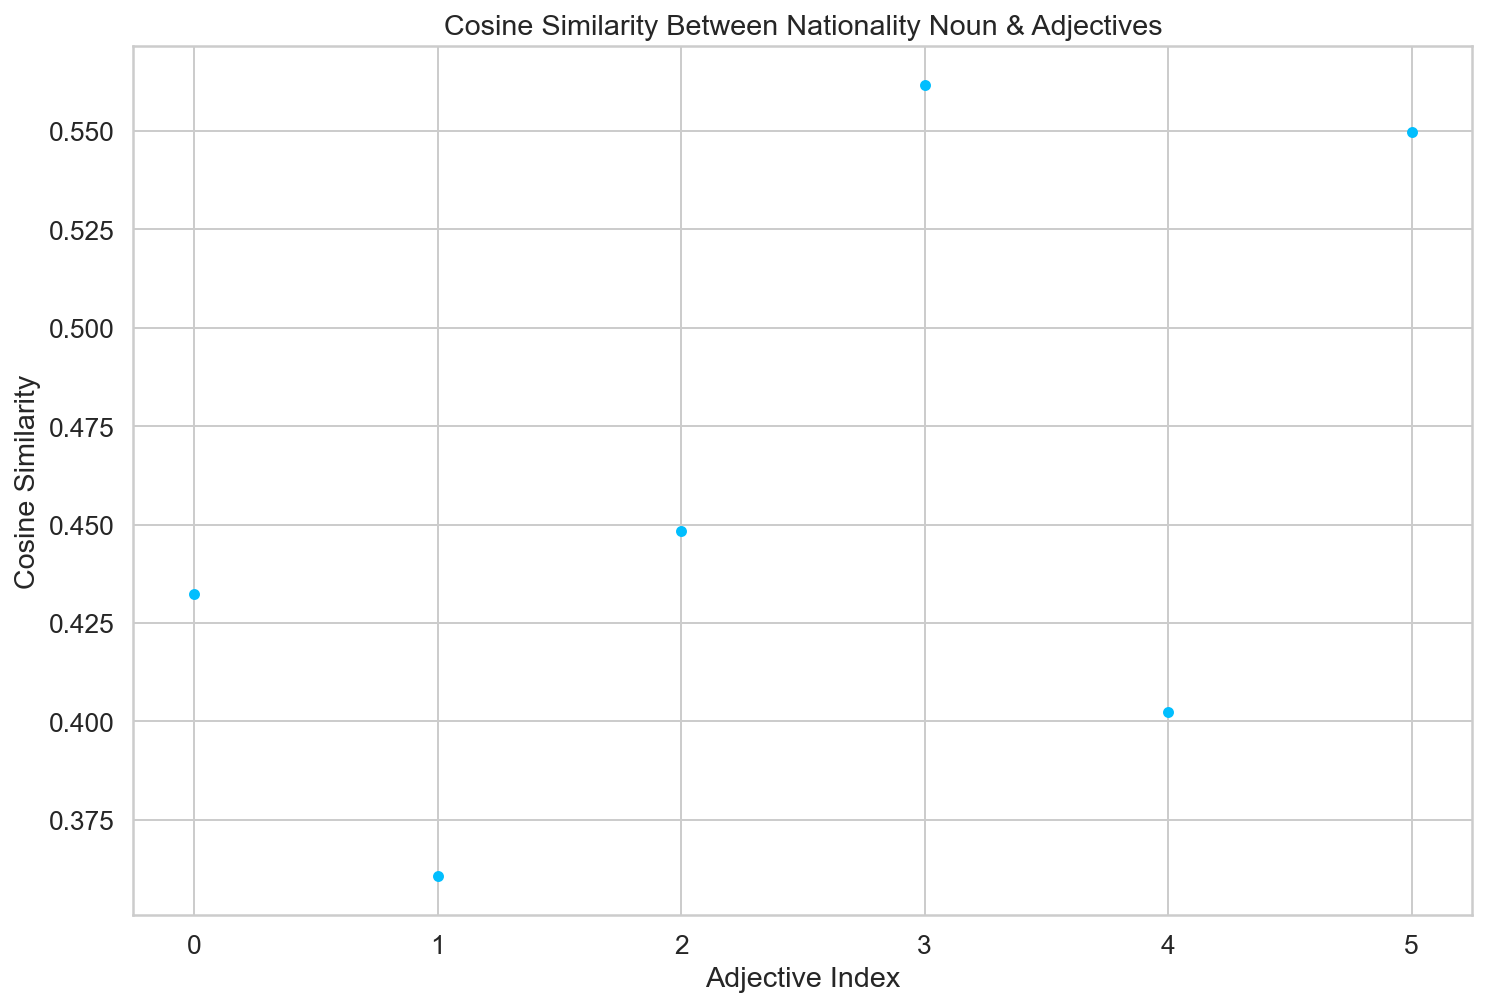

In [273]:
test_adjectives = ['fat', 'lazy', 'stupid', 'fit', 'hardworking', 'smart']
test_nationalities = ['european']

ta_embeddings = model.encode(test_adjectives)
tn_embeddings = model.encode(test_nationalities)

test_cos = cosine_similarity(
    [tn_embeddings[0]],
    ta_embeddings[:]
)


european_cs_df = pd.DataFrame(test_cos)
european_cs_df = european_cs_df.transpose()

european_cs_df['index_col'] = european_cs_df.index

european_cs_df.plot.scatter(
    x="index_col", 
    y=0, 
    title='Cosine Similarity Between Nationality Noun & Adjectives',
    xlabel='Adjective Index',
    ylabel='Cosine Similarity'
    )

In [274]:
test_adjectives = ['fat', 'lazy', 'stupid', 'fit', 'hardworking', 'smart']
test_nationalities = ['asian']

ta_embeddings = model.encode(test_adjectives)
tn_embeddings = model.encode(test_nationalities)

test_cos = cosine_similarity(
    [tn_embeddings[0]],
    ta_embeddings[:]
)


asian_cs_df = pd.DataFrame(test_cos)
asian_cs_df = asian_cs_df.transpose()

asian_cs_df['index_col'] = asian_cs_df.index

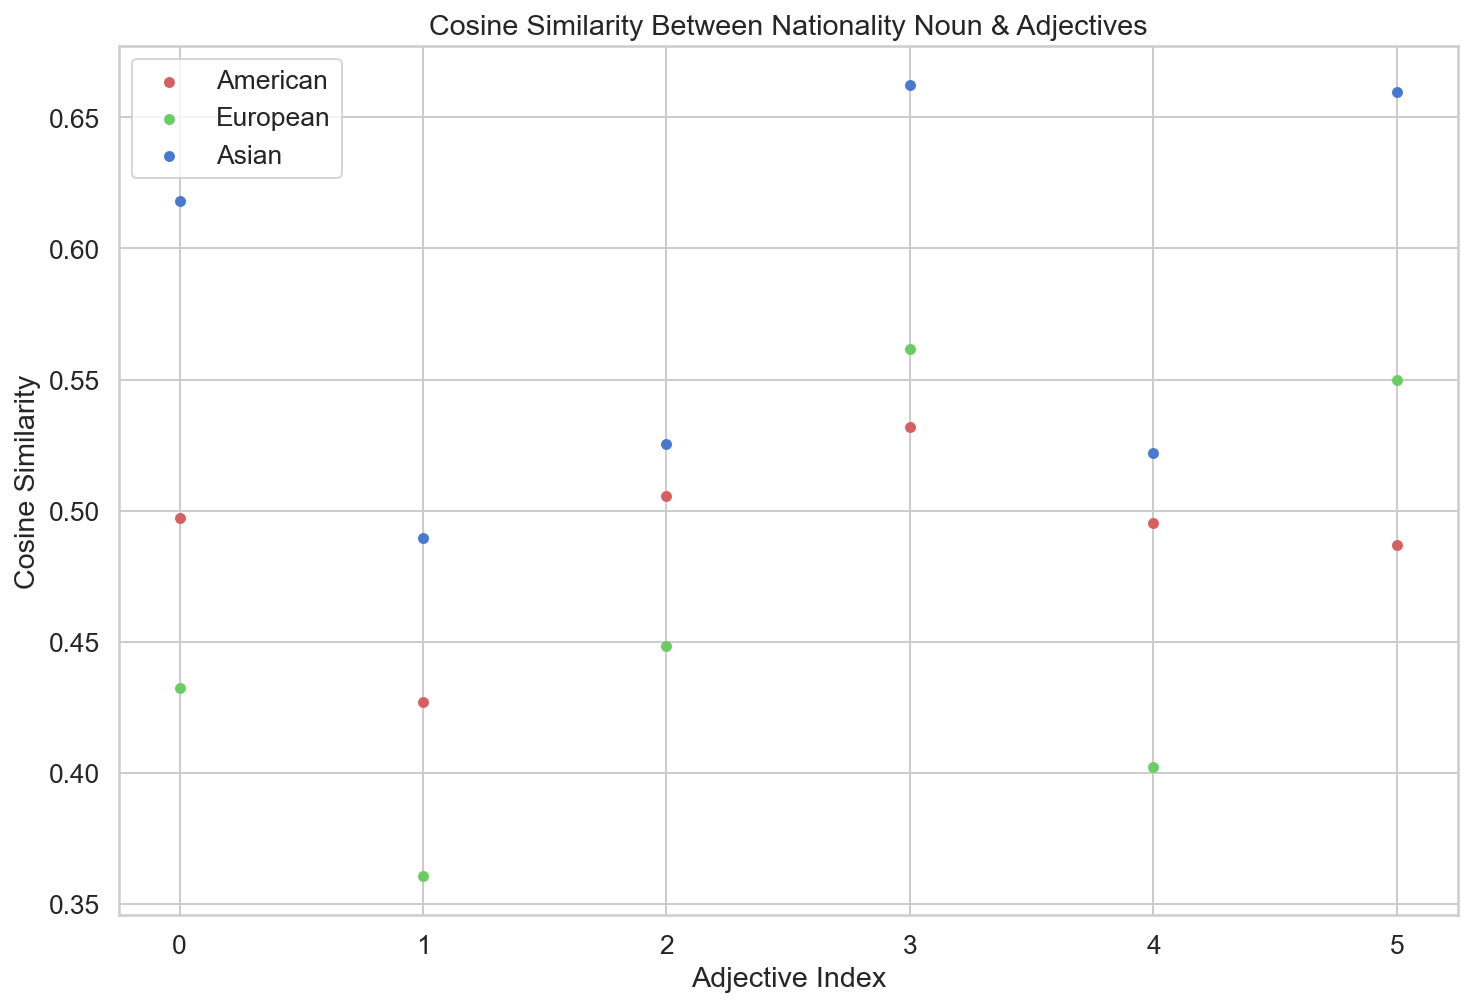

In [275]:
ax = american_cs_df.plot(x='index_col', y=0, kind='scatter', c='r', label='American')
european_cs_df.plot(x='index_col', y=0, kind='scatter', ax=ax, c='g', label='European')
asian_cs_df.plot(x='index_col', y=0, kind='scatter', ax=ax, c='b', label='Asian',

    title='Cosine Similarity Between Nationality Noun & Adjectives',
    xlabel='Adjective Index',
    ylabel='Cosine Similarity'
    )
plt.show()

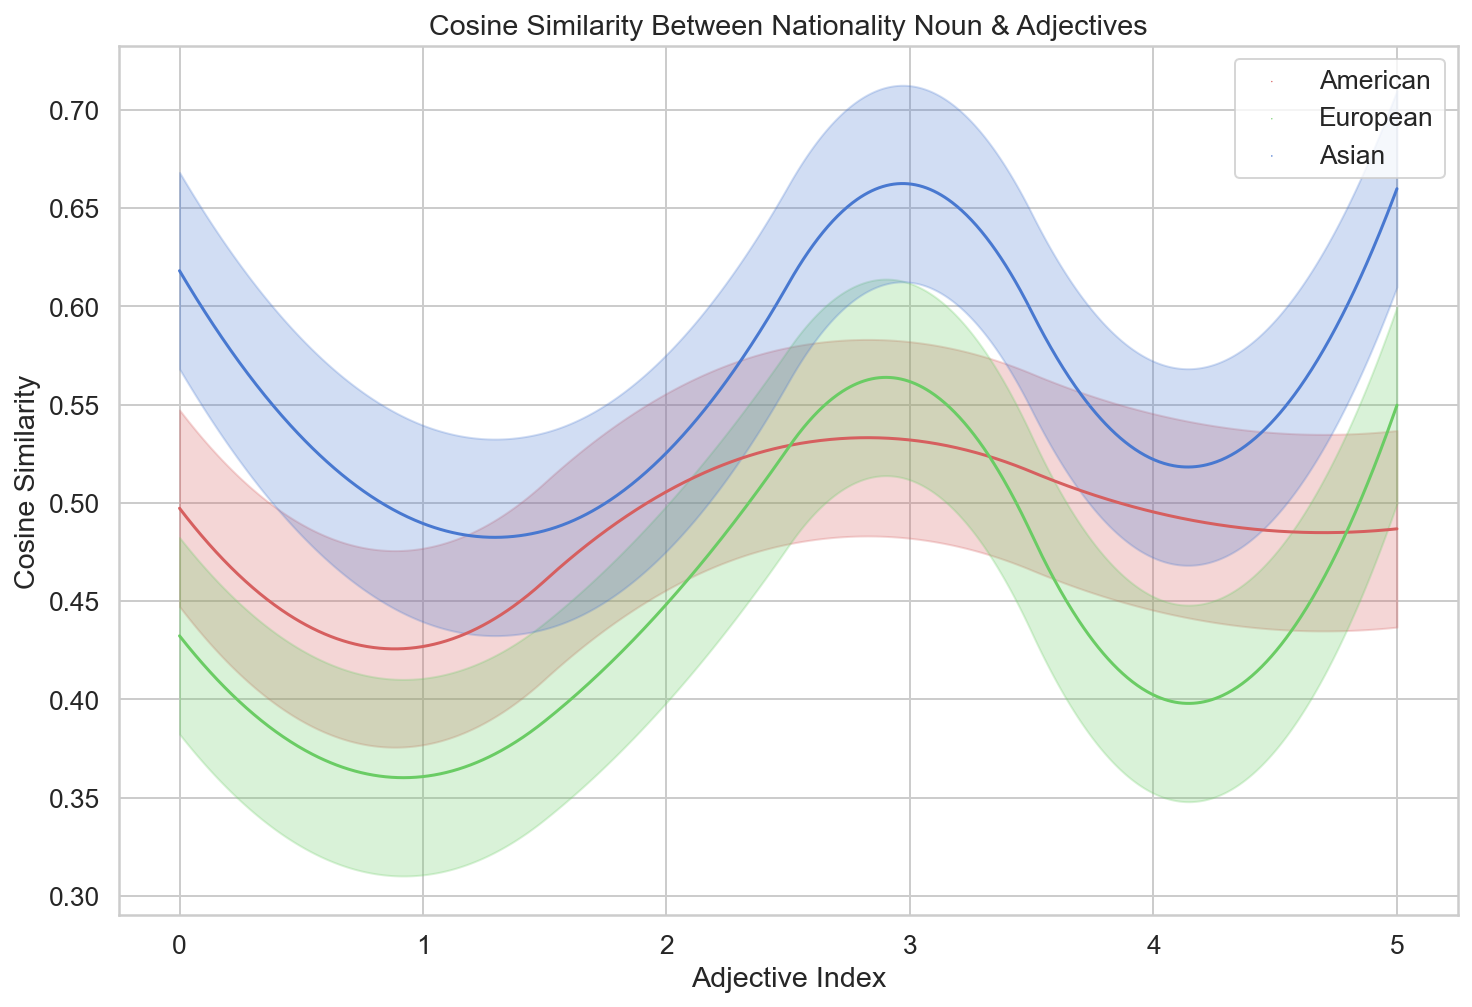

In [285]:
ax = american_cs_df.plot(x='index_col', y=0, kind='scatter', c='r', label='American', edgecolors='none', s=0)
european_cs_df.plot(x='index_col', y=0, kind='scatter', ax=ax, c='g', label='European', edgecolors='none', s=0)
asian_cs_df.plot(x='index_col', y=0, kind='scatter', ax=ax, c='b', label='Asian', edgecolors='none', s=0,
    title='Cosine Similarity Between Nationality Noun & Adjectives',
    xlabel='Adjective Index',
    ylabel='Cosine Similarity'
    )

# American
x = american_cs_df["index_col"]
y = american_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=0, stop=5, num=1000)
y2 = fun(x2)

plt.plot(x2, y2, color='r')
plt.plot(x, y, ls='', marker='o', color='r', alpha=0)

# Fill Between
#error = np.random.normal(0.08, 0.05, size=y.shape)
error = .05
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='r')

# European
x = european_cs_df["index_col"]
y = european_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=0, stop=5, num=1000)
y2 = fun(x2)

plt.plot(x2, y2, color='g')
plt.plot(x, y, ls='', marker='o', color='g', alpha=0)

# Fill Between
error = .05
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='g')

# Asian
x = asian_cs_df["index_col"]
y = asian_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=0, stop=5, num=1000)
y2 = fun(x2)

plt.plot(x2, y2, color='b')
plt.plot(x, y, ls='', marker='o', color='b', alpha=0)

# Fill Between
error = .05
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='b')

plt.show()

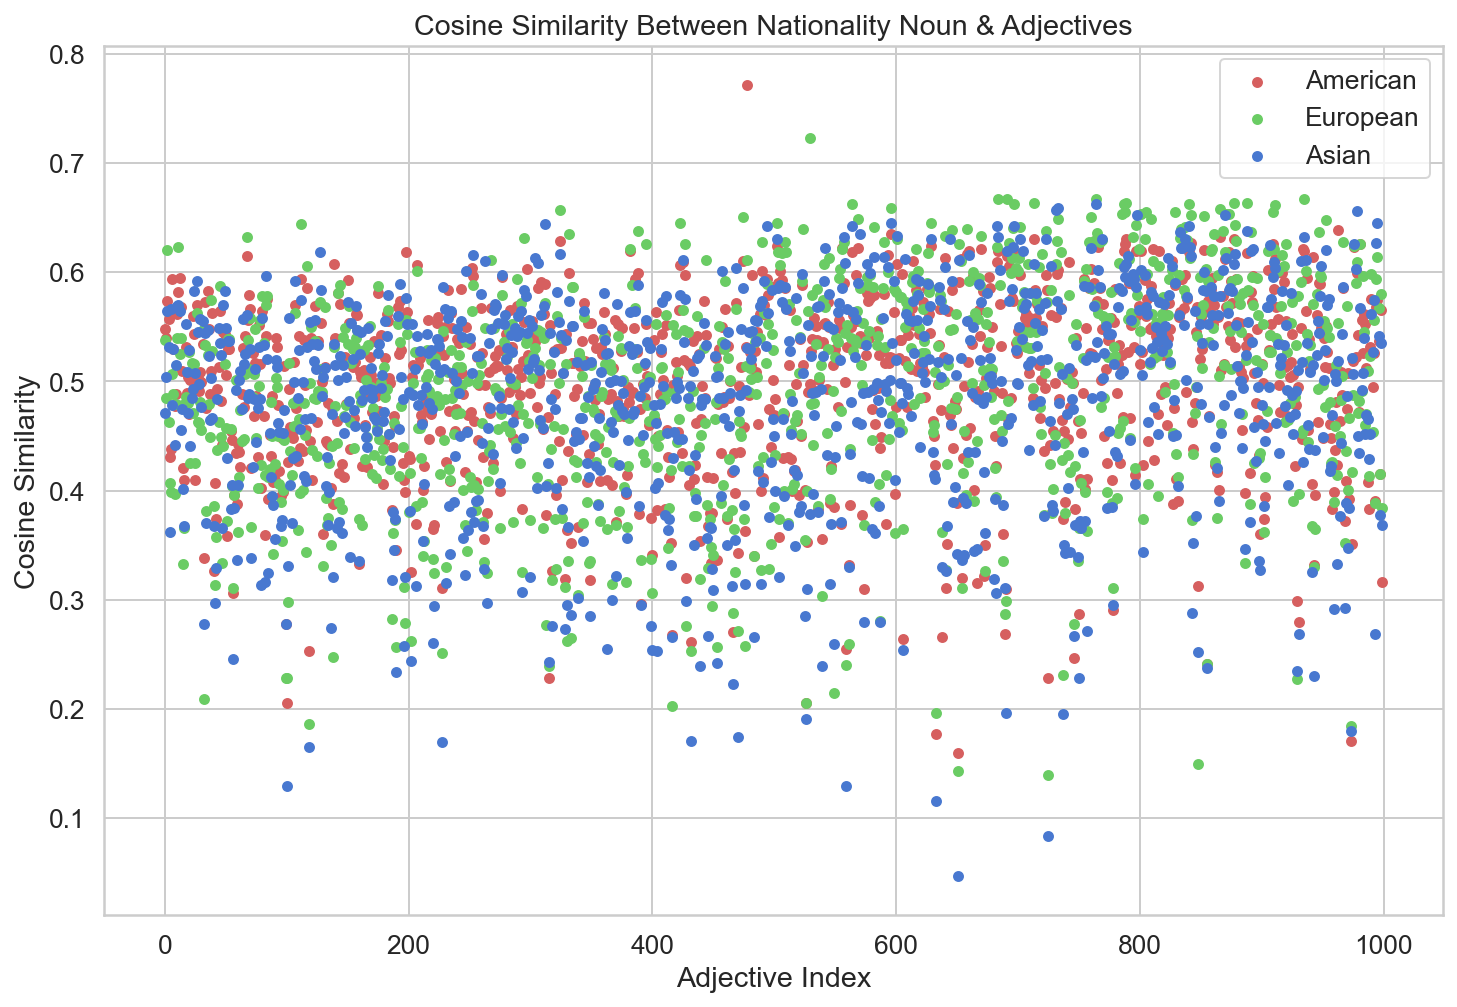

In [184]:
# American
test_nationalities = ['american']

tn_embeddings = model.encode(test_nationalities)

test_cos = cosine_similarity(
    [tn_embeddings[0]],
    sentence_embeddings[:]
)


american_cs_df = pd.DataFrame(test_cos)
american_cs_df = american_cs_df.transpose()

american_cs_df['index_col'] = american_cs_df.index

# European
test_nationalities = ['european']

tn_embeddings = model.encode(test_nationalities)

test_cos = cosine_similarity(
    [tn_embeddings[0]],
    sentence_embeddings[:]
)


european_cs_df = pd.DataFrame(test_cos)
european_cs_df = european_cs_df.transpose()

european_cs_df['index_col'] = american_cs_df.index

# Asian
test_nationalities = ['asian']

tn_embeddings = model.encode(test_nationalities)

test_cos = cosine_similarity(
    [tn_embeddings[0]],
    sentence_embeddings[:]
)

asian_cs_df = pd.DataFrame(test_cos)
asian_cs_df = asian_cs_df.transpose()


asian_cs_df['index_col'] = asian_cs_df.index

# Plotting
ax = american_cs_df.plot(x='index_col', y=0, kind='scatter', c='r', label='American')
european_cs_df.plot(x='index_col', y=0, kind='scatter', ax=ax, c='g', label='European')
asian_cs_df.plot(x='index_col', y=0, kind='scatter', ax=ax, c='b', label='Asian',

    title='Cosine Similarity Between Nationality Noun & Adjectives',
    xlabel='Adjective Index',
    ylabel='Cosine Similarity'
    )
plt.show()

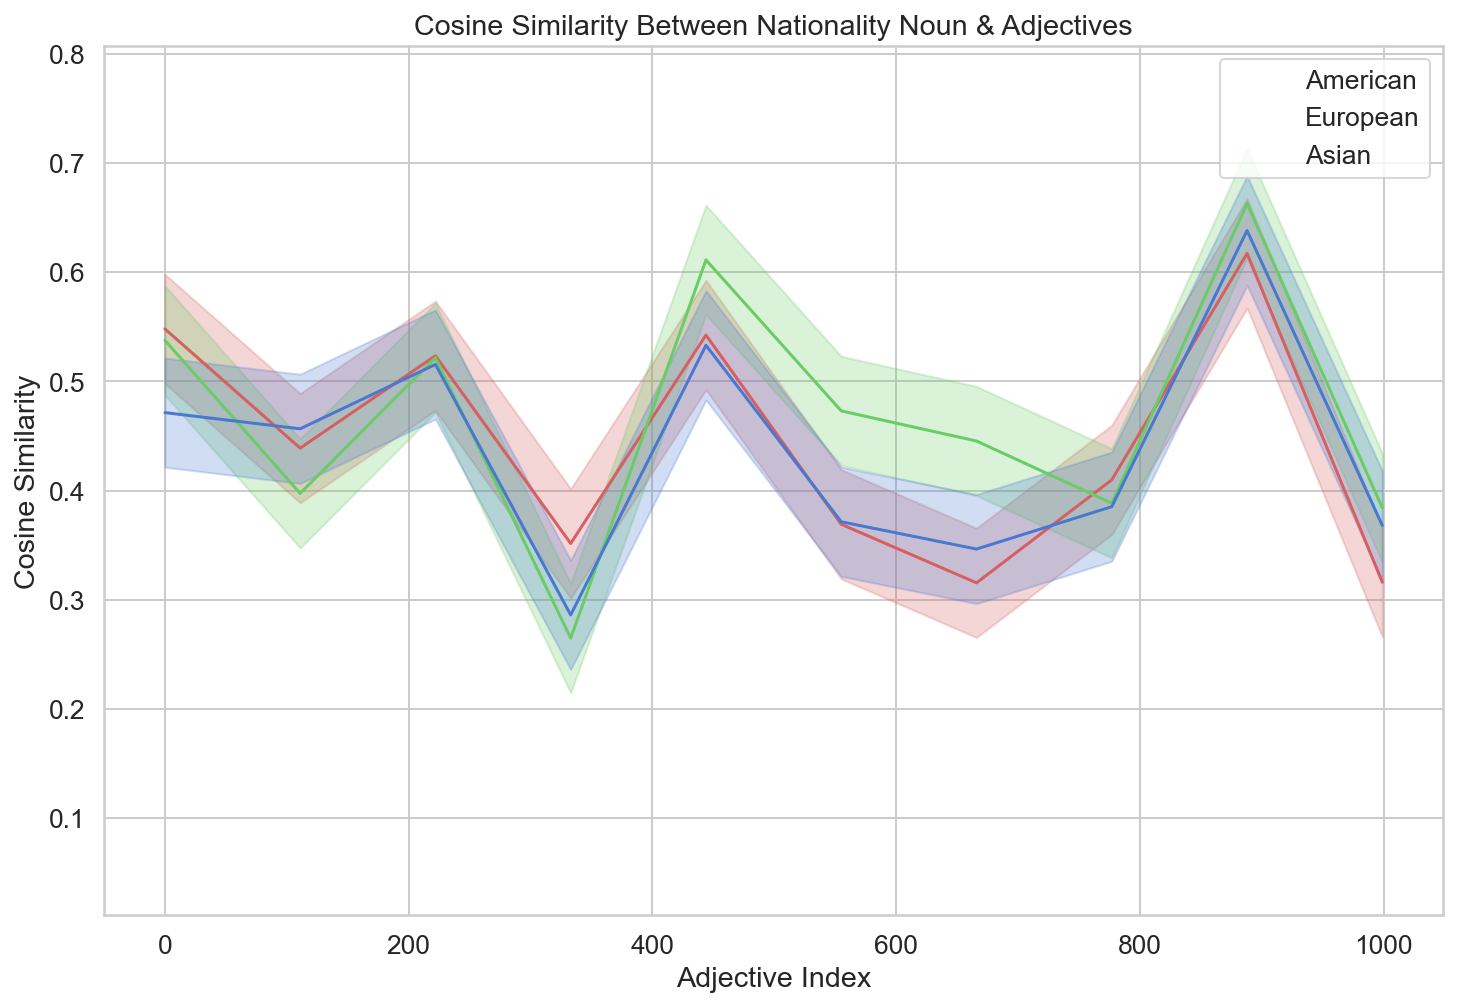

In [306]:
# American
test_nationalities = ['american']

tn_embeddings = model.encode(test_nationalities)

test_cos = cosine_similarity(
    [tn_embeddings[0]],
    sentence_embeddings[:]
)

american_cs_df = pd.DataFrame(test_cos)
american_cs_df = american_cs_df.transpose()

american_cs_df['index_col'] = american_cs_df.index


# European
test_nationalities = ['european']

tn_embeddings = model.encode(test_nationalities)

test_cos = cosine_similarity(
    [tn_embeddings[0]],
    sentence_embeddings[:]
)

european_cs_df = pd.DataFrame(test_cos)
european_cs_df = european_cs_df.transpose()

european_cs_df['index_col'] = american_cs_df.index


# Asian
test_nationalities = ['asian']

tn_embeddings = model.encode(test_nationalities)

test_cos = cosine_similarity(
    [tn_embeddings[0]],
    sentence_embeddings[:]
)

asian_cs_df = pd.DataFrame(test_cos)
asian_cs_df = asian_cs_df.transpose()

asian_cs_df['index_col'] = asian_cs_df.index

# Plotting

ax = american_cs_df.plot(x='index_col', y=0, kind='scatter', c='r', label='American', edgecolors='none', s=10, alpha=0)
european_cs_df.plot(x='index_col', y=0, kind='scatter', ax=ax, c='g', label='European', edgecolors='none', s=10, alpha=0)
asian_cs_df.plot(x='index_col', y=0, kind='scatter', ax=ax, c='b', label='Asian', edgecolors='none', s=10, alpha=0,
    title='Cosine Similarity Between Nationality Noun & Adjectives',
    xlabel='Adjective Index',
    ylabel='Cosine Similarity'
    )

# American
x = american_cs_df["index_col"]
y = american_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=0, stop=999, num=10)
y2 = fun(x2)

plt.plot(x2, y2, color='r')
plt.plot(x, y, ls='', marker='o', color='r', alpha=0)

error = .05
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='r')


# European
x = european_cs_df["index_col"]
y = european_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=0, stop=999, num=10)
y2 = fun(x2)

plt.plot(x2, y2, color='g')
plt.plot(x, y, ls='', marker='o', color='g', alpha=0)

# Fill Between
error = .05
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='g')

# Asian
x = asian_cs_df["index_col"]
y = asian_cs_df[0]

fun = interp1d(x=x, y=y, kind=2)
x2 = np.linspace(start=0, stop=999, num=10)
y2 = fun(x2)

plt.plot(x2, y2, color='b')
plt.plot(x, y, ls='', marker='o', color='b', alpha=0)

# Fill Between
error = .05
plt.fill_between(x2, y2-error, y2+error, alpha=0.25, color='b')

plt.show()
